# pilgram example

## setup

In [9]:
!wget "https://github.com/akiomik/pilgram/blob/master/notebooks/mtjimba.jpg?raw=true" -O mtjimba.jpg


--2023-08-01 14:16:11--  https://github.com/akiomik/pilgram/blob/master/notebooks/mtjimba.jpg?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... ^C


## original image

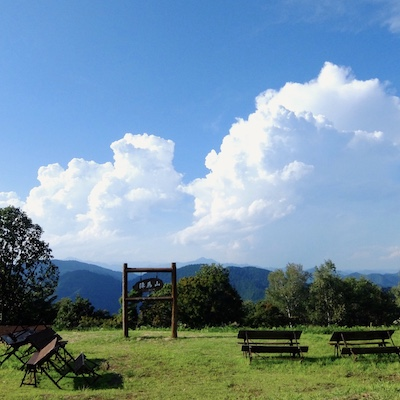

In [1]:
from IPython import display

# display.display_png(display.Image('figure.png'))

display.display_jpeg(display.Image('mtjimba.jpg'))

## image with filter

In [17]:
from pilgram import _1977, aden, brannan, brooklyn, clarendon, earlybird, gingham, hudson, inkwell, kelvin, lark, lofi, maven, mayfair, moon, nashville, perpetua, reyes, rise, slumber, stinson, toaster, valencia, walden, willow, xpro2
from PIL import Image

# 你的输入图像文件路径
input_image_path = "img/mtjimba.jpg"

# 定义滤镜函数列表
filters = [_1977, aden, brannan, brooklyn, clarendon, earlybird, gingham, hudson, inkwell, kelvin, lark, lofi, maven, mayfair, moon, nashville, perpetua, reyes, rise, slumber, stinson, toaster, valencia, walden, willow, xpro2]

# 循环应用滤镜并保存图像
for filter_func in filters:
    im = Image.open(input_image_path)
    filtered_im = filter_func(im)
    filter_name = filter_func.__name__
    output_path = f"img/{filter_name}.jpg"
    filtered_im.save(output_path)
    print(f"Applied {filter_name} and saved as {output_path}")


Applied _1977 and saved as _1977.jpg
Applied aden and saved as aden.jpg
Applied brannan and saved as brannan.jpg
Applied brooklyn and saved as brooklyn.jpg
Applied clarendon and saved as clarendon.jpg
Applied earlybird and saved as earlybird.jpg
Applied gingham and saved as gingham.jpg
Applied hudson and saved as hudson.jpg
Applied inkwell and saved as inkwell.jpg
Applied kelvin and saved as kelvin.jpg
Applied lark and saved as lark.jpg
Applied lofi and saved as lofi.jpg
Applied maven and saved as maven.jpg
Applied mayfair and saved as mayfair.jpg
Applied moon and saved as moon.jpg
Applied nashville and saved as nashville.jpg
Applied perpetua and saved as perpetua.jpg
Applied reyes and saved as reyes.jpg
Applied rise and saved as rise.jpg
Applied slumber and saved as slumber.jpg
Applied stinson and saved as stinson.jpg
Applied toaster and saved as toaster.jpg
Applied valencia and saved as valencia.jpg
Applied walden and saved as walden.jpg
Applied willow and saved as willow.jpg
Applied

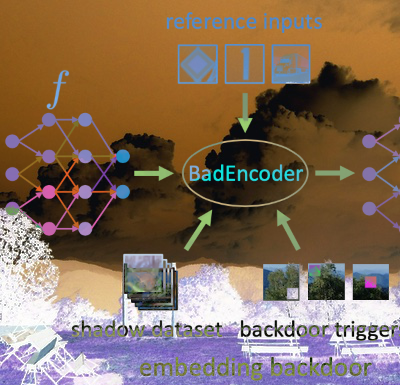

In [15]:
from PIL import Image
import pilgram.css.blending

backdrop = Image.open('mtjimba.jpg')
source = Image.open('figure.png')
pilgram.css.blending.exclusion(backdrop, source)

In [1]:
import torch
torch.cuda.set_device(3)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from pytorch_ssim import SSIM

# from piq import ssim, SSIMLoss
from tqdm import tqdm



class CIFAR10M(Dataset):
    def __init__(self, numpy_file, class_type, transform1=None,transform2=None):
        """
        Args:
            numpy_file (string): Path to the numpy file.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.input_array = np.load(numpy_file)
        self.data = self.input_array['x']
        self.targets = self.input_array['y'][:,0].tolist()
        self.classes = class_type
        self.transform1 = transform1
        self.transform2 = transform2

    def __len__(self):
        return self.data.shape[0]

    """CIFAR10 Dataset.
    """
    def __getitem__(self, index):
        img, target = self.data[index], self.targets[index]
        img = Image.fromarray(img)

        return self.transform1(img), self.transform2(img)

train_transform = transforms.Compose([
    # transforms.Resize(32),
    # transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=1.0),
    # transforms.RandomGrayscale(p=1.0),
    transforms.ToTensor(),
    # transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010]),
])

test_transform_cifar10 = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010]),
])

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# data = CIFAR10M(numpy_file='data/cifar10/train.npz', class_type=classes, transform1=train_transform,transform2=test_transform_cifar10)
# 第一个transfrom是用来生成misa训练样本的，第二个transform是用来生成给filter训练的样本的
# memory_loader = DataLoader(data, batch_size=4096, shuffle=False, pin_memory=True)

filter_size = 7


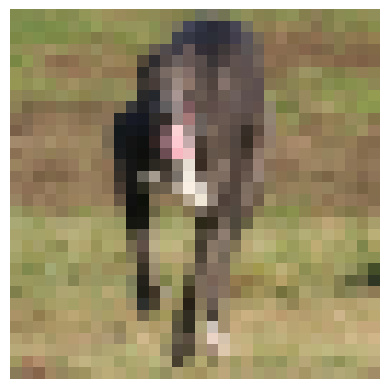

In [2]:
# input_array = np.load('data/cifar10/train.npz')
input_array = np.load('data/stl10/train_unlabeled.npz')

data = input_array['x']
img=data[1]

plt.imshow(img)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


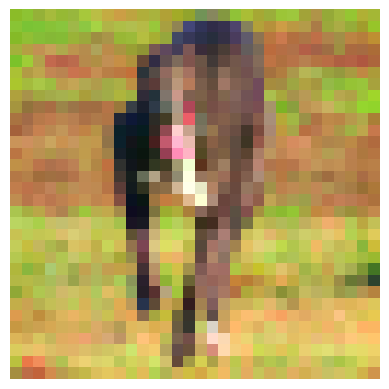

In [3]:
filter_size = 7

# filter=torch.load('trigger/filter_2023-08-17-21-27-15.pt', map_location=torch.device('cpu'))
# filter=torch.load('trigger/filter_2023-08-17-22-06-01.pt', map_location=torch.device('cpu'))
# filter=torch.load('trigger/filter.pt', map_location=torch.device('cpu'))
filter=torch.load('trigger/stl10/filter_2023-08-30-13-03-06.pt', map_location=torch.device('cpu'))

img_=torch.tensor(img).float().permute(2,0,1)
perturbed_image = F.conv2d(img_, filter, padding=filter_size//2)

# ssim = SSIM()
# loss_ssim2 = ssim(img_, perturbed_image)

perturbed_image_np = perturbed_image.cpu().detach().numpy()

plt.imshow(np.transpose(perturbed_image_np.astype(int), (1, 2, 0)))
plt.axis('off')
plt.show()

In [6]:
filter=torch.load('trigger/filter.pt', map_location=torch.device('cpu'))
filter_size = 7
first_input_image= next(iter(memory_loader))[0][1]  # 获取第一个批量的图像数据
first_input_image = first_input_image

perturbed_image = F.conv2d(first_input_image, filter, padding=filter_size//2)

# perturbed_image = F.conv2d(img.to(torch.float32).permute(2,0,1), filter, padding=filter_size//2)

perturbed_image_np = perturbed_image.cpu().detach().numpy()

# filter=torch.load('trigger/filter.pt', map_location=torch.device('cpu'))
# img=torch.from_numpy(img)
# perturbed_image = F.conv2d(img.permute(2,0,1).float(), filter, padding=3//2)


# perturbed_image_np = perturbed_image.permute(1, 2, 0).cpu().detach().numpy()#

mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]

perturbed_image_np = perturbed_image_np * std + mean

# Clip the pixel values to [0, 255] in case they go out of range due to the transformation
perturbed_image_np = (perturbed_image_np * 255).clip(0, 255).astype('uint8')

# Convert the NumPy array to a PIL image
perturbed_image_pil = Image.fromarray(perturbed_image_np)


plt.imshow(perturbed_image_np)
plt.axis('off')
plt.show()


NameError: name 'memory_loader' is not defined

# imagenet 可视化

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import StepLR

from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from pytorch_ssim import SSIM
from datetime import datetime
# from piq import ssim, SSIMLoss
from tqdm import tqdm

from torchvision import transforms
from bd_dataset_imagenet_filter import BadEncoderDataset
import numpy as np
from network import U_Net


timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")

bd_transform = transforms.Compose([
    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=1.0),
    transforms.RandomGrayscale(p=1.0),
    transforms.ToTensor(),
])

transform1 = transforms.Compose([
    transforms.ToTensor(),
])

classes = [str(i) for i in range(5)]


training_data_num = 100
# np.random.seed(100)
training_data_sampling_indices = np.random.choice(training_data_num, int(training_data_num*0.1), replace=False)

shadow_dataset = BadEncoderDataset(
    root = "data/imagenet/train",
    class_type=classes,indices = training_data_sampling_indices,
    transform=transform1,
    bd_transform=bd_transform,
)
train_loader = DataLoader(shadow_dataset, batch_size=16, shuffle=True, pin_memory=True, drop_last=True)

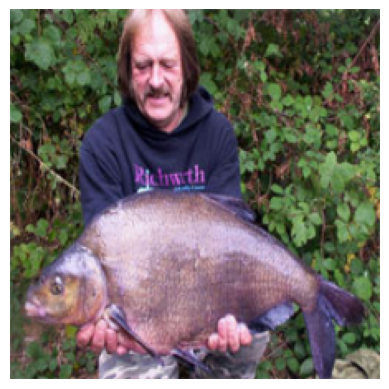

In [50]:
img=shadow_dataset[2][1]
scaled_image = (img.cpu().detach().numpy() * 255).astype(np.uint8)
img_backdoor = Image.fromarray(np.transpose(scaled_image,(1,2,0)))
plt.imshow(img_backdoor)
plt.axis('off')
plt.show()

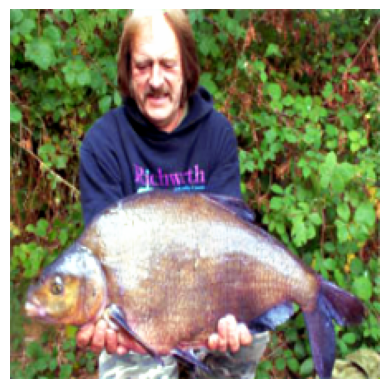

In [51]:
unet = torch.load('/home/hrzhang/projects/BadEncoder-main/trigger/imagenet/filter_2023-09-26-22-35-59.pt', map_location=torch.device('cpu'))
backdoored_image=unet(img.unsqueeze(0))
img_backdoor = backdoored_image.squeeze()
scaled_image = (img_backdoor.cpu().detach().numpy() * 255).astype(np.uint8)
img_backdoor = Image.fromarray(np.transpose(scaled_image,(1,2,0)))
plt.imshow(img_backdoor)
plt.axis('off')
plt.show()

# CIFAR10可视化

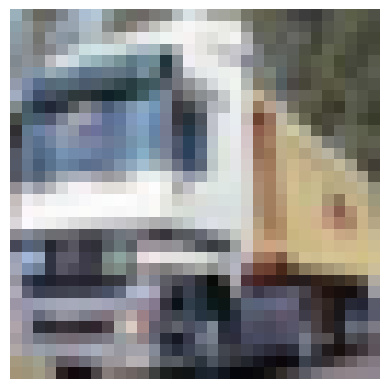

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from optimize_filter.network import AttU_Net

# input_array = np.load('data/imagenet/train')
input_array = np.load('data/cifar10/train.npz')

img_ = input_array['x']
img = Image.fromarray(img_[1])

# img
plt.imshow(img)
plt.axis('off')
plt.show()

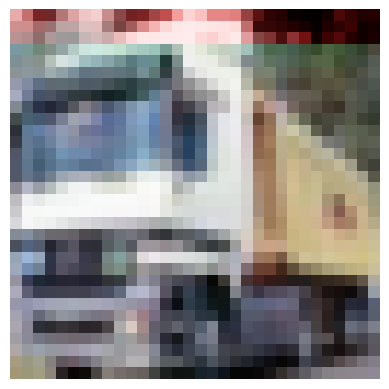

In [3]:
transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

tensor_image = transform1(img)
path='/home/hrzhang/projects/badencoder_filter/optimize_filter/trigger/2023-11-14-23-18-06/ssim0.9621_psnr26.53_lp0.0028_wd3.106.pt'
# path='/home/hrzhang/projects/badencoder_filter/optimize_filter/trigger/2023-11-14-23-18-06/ssim0.9721_psnr29.62_lp0.0021_wd2.738.pt'
state_dict = torch.load(path, map_location=torch.device('cpu'))
# state_dict = torch.load('output/cifar10/stl10_backdoored_encoder/unet_filter_trained.pt', map_location=torch.device('cpu'))
# state_dict = torch.load('optimize_filter/trigger/2023-11-14-22-49-49/ssim0.9621_psnr27.45_lp0.0040_wd2.993.pt', map_location=torch.device('cpu'))

net = AttU_Net(img_ch=3,output_ch=3)
net.load_state_dict(state_dict['model_state_dict'])
net=net.eval()
img_backdoor=net(tensor_image.unsqueeze(0))

mean = torch.tensor([0.4914, 0.4822, 0.4465]).view(1, 3, 1, 1)
std = torch.tensor([0.2023, 0.1994, 0.2010]).view(1, 3, 1, 1)

img_backdoor = img_backdoor * std + mean # denormalize

# img_backdoor = torch.clamp(img_backdoor, min=0, max=1)

sig=torch.nn.Sigmoid()
img_backdoor = sig(img_backdoor)

scaled_image = (img_backdoor.squeeze().detach().numpy() * 255).astype(np.uint8)
img_backdoor = Image.fromarray(np.transpose(scaled_image,(1,2,0)))

img_backdoor = img_backdoor.convert('RGB')
plt.imshow(img_backdoor)
plt.axis('off')  # Hide axis
plt.show()

# IMAGENET可视化

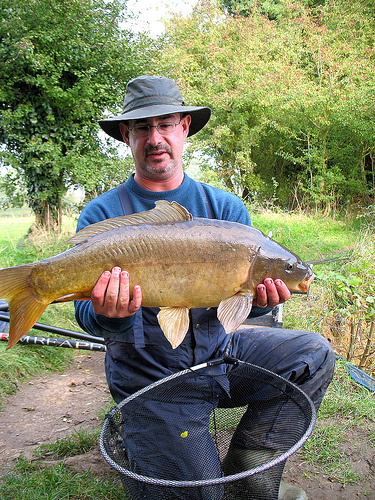

In [ ]:
from PIL import Image
img=Image.open('data/imagenet/train/n01440764/n01440764_18.JPEG')
img

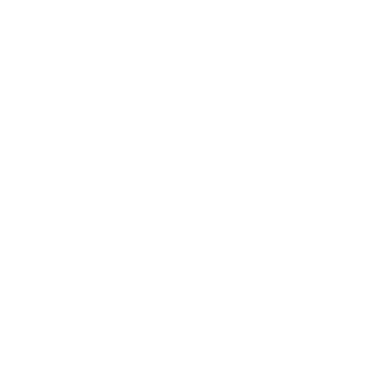

In [ ]:
transform1 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

tensor_image = transform1(img)

state_dict = torch.load('optimize_filter/trigger/unet_filter_trained.pt', map_location=torch.device('cpu'))

net = AttU_Net(img_ch=3,output_ch=3)
net.load_state_dict(state_dict['model_state_dict'])
net=net.eval()
img_backdoor=net(tensor_image.unsqueeze(0))

scaled_image = (img_backdoor.squeeze().detach().numpy() * 255).astype(np.uint8)
img_backdoor = Image.fromarray(np.transpose(scaled_image,(1,2,0)))


img_backdoor = img_backdoor.convert('RGB')
plt.imshow(img_backdoor)
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
net(tensor_image.unsqueeze(0))

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]], grad_fn=<SigmoidBackward0>)